# Calculation of the deformation velocity 


In this notebook, we present explicit calculations with the deformation velocity $\mathbf{v}_d$ associated to a given velocity field $\mathbf{v}$. 

This is defined following a decomposition of the original velocity field into two components

$$
\begin{equation}
\label{eq1}
\mathbf{v} = \mathbf{v}_{RB} + \mathbf{v}_{d},
\end{equation}
$$

where $\mathbf{v}_{RB}$ is the rigid body-component of the velocity field and $\mathbf{v}_d$ comes from deformations. 
We propose three criteria for defining $\mathbf{v}_{RB}$

- It should be a rigid body velocity field that is closest to the original velocity field in a physically relevant norm.

- The deformation component, which we get by subtracting $\mathbf{v}_{RB}$ from the original velocity field should be objective (or frame indifferent) in order to capture
intrinsic features of the fluid (see Truesdell & Noll (2004)),

- The deformation component should be observable: an appropriately chosen, single observer of the fluid flow should be able to measure this deformation velocity field over the whole domain.


Our approach is based on looking for the $\mathbf{v}_{RB}$ as the $L^{2}$ closest velocity field to the input velocity field $\mathbf{v}$. Without loss of generality, the rigid-body velocity field $\mathbf{v}_{RB}$ can be written as 

$$
\begin{equation}
\label{eq2}
\mathbf{v}_{RB} = \bar{\mathbf{v}} + \boldsymbol{\omega} \times (\mathbf{x} - \bar{\mathbf{x}}),
\end{equation}
$$

where the overbar denotes spatial averaging over a chosen domain $U \in \mathbb{R}^{3}$. We then minimize the functional defined as 

$$
L_{1}(\boldsymbol{\Omega},t) = \frac{1}{M}\int_{U}\left\{ \left|\mathbf{v}(\mathbf{\mathbf{x}},t)-\dot{\mathbf{x}}_{A}(t)-\boldsymbol{\Omega}(t)\left(\mathbf{x}-\mathbf{x}_{A}(t)\right)\right|^{2}\right\}\rho(\mathbf{x},t)dV,
$$

where M is the total mass contained in the volume $U$ and $\rho(\mathbf{x},t)$ is the density.

A unique minimizing angular velocity exists and can be written as
$$
\boldsymbol{\omega}=M\boldsymbol{\Theta}^{-1}\overline{(\mathbf{x}-\bar{\mathbf{x}})\times(\mathbf{v}-\bar{\mathbf{v}})},
$$

with the moment of inertia tensor defined as 

$$
\boldsymbol{\Theta} = M\overline{\left(\left|\mathbf{x}-\bar{\mathbf{x}}\right|^{2}\right)\mathbf{I}-(\mathbf{x}-\bar{\mathbf{x}})\otimes(\mathbf{x}-\bar{\mathbf{x}})}.
$$

In the following sections, we calculate the minimizing $\boldsymbol{\omega}$ and through it, the deformation velocity $$
\begin{equation}
\label{eq3}
\mathbf{v}_d = \mathbf{v} - \bar{\mathbf{v}} - \boldsymbol{\omega} \times (\mathbf{x} - \bar{\mathbf{x}}).
\end{equation}
$$

As shown in Kaszás, Pedergnana, & Haller (2022), the deformation velocity field defined in (3) is objective. This means, that an observer in the rotating $\mathbf{y}-$ frame will measure the velocity to be 

$$
\hat{\mathbf{v}} = \mathbf{Q}^T(t)\mathbf{v},
$$

if the (stationary) $\mathbf{x}-$ and (rotating and translating) $\mathbf{y}-$ frames are related by

$$
\mathbf{x} = \mathbf{Q}(t)\mathbf{y} + \mathbf{b}(t).
$$

# Three-dimensional examples

In [3]:
from sympy import latex
from IPython.display import display_latex

## The following helper function is used for displaying variables in latex form
def disp(idx, symObj):
    eqn = '\\[' + idx + ' = ' + latex(symObj) + '\\]'
    display_latex(eqn,raw=True)
    return

In [4]:
import sympy as sy
import sympy.vector
R = sy.vector.CoordSys3D('R')

In [16]:
x1, x2, x3, t = sy.symbols('x_1,x_2,x_3,t')
a = sy.symbols('a', positive=True)

We demonstrate here how the deformation velocity could be calculated for 3D flows. We will consider the ABC flow as a starting point.

 This is given as


In [18]:
A, B, C = sy.symbols('A B C')
velocityABC = (A*sy.sin(R.z) + C*sy.cos(R.y))*R.i + (B*sy.sin(R.x) + A*sy.cos(R.z))*R.j + (C*sy.sin(R.y) + B*sy.cos(R.x))*R.k
position = R.x * R.i + R.y * R.j + R.z * R.k
velocityABCOrig = velocityABC.to_matrix(R).subs([(R.x, x1), (R.y, x2), (R.z, x3)])
disp('\\mathbf{v}(x_1,x_2,x_3)', velocityABCOrig)


A standard choice for the parameters is $A = \sqrt{3}$, $B = \sqrt{2}$ and $C=1$.


- We transform the steady velocity field to a rotating frame and show that the classic kinetic energy $\frac{1}{2}\langle\mathbf{v}, \mathbf{v}\rangle$ is heavily influenced by the rotation of the reference frame

- Then we calculate the objective version, the deformation kinetic energy  $E_d = \frac{1}{2}\langle \mathbf{v}_d, \mathbf{v}_d\rangle$

- This can be explicitly verified that the deformation energy remains the same in the rotating reference frame.

In [102]:
def average_overDomain3D(quantity, variables, domainX, domainY, domainZ):
    xmin, xmax = domainX
    ymin, ymax = domainY
    zmin, zmax = domainZ
    domainSize = (xmax - xmin) * (ymax - ymin) * (zmax - zmin)
    
    return sy.Matrix(
        [sy.integrate(quantity[i], (variables[0], xmin, xmax), 
                        (variables[1], ymin, ymax),
                        (variables[2], zmin, zmax)).doit() / (domainSize) for i in range(len(quantity))])




In [81]:
def InertiaTensor( domainX, domainY, domainZ):
    # calculate integration limits

    xmin, xmax = domainX
    ymin, ymax = domainY
    zmin, zmax = domainZ
    xmid = 0.5* (xmin + xmax)
    ymid = 0.5* (ymin + ymax)
    zmid = 0.5* (zmin + zmax)
    domainSize = (xmax - xmin) * (ymax - ymin) * (zmax - zmin)
    
    
    position = sy.Matrix([x - xmid,y - ymid,z - zmid])
    positionsq = (x - xmid)**2 + (y - ymid)**2 + (z - zmid)**2
    inertia = positionsq * sy.eye(3)- position * sy.transpose(position)
    # do the integration in the y and then the x and z directions.     
    inertiaAvgy = sy.integrate(inertia, (y, ymin, ymax)).doit()
    inertiaAvgx = sy.integrate(inertiaAvgy, (x, xmin, xmax)).doit()
    averageInertia = sy.simplify(sy.integrate(inertiaAvgx, (z, zmin, zmax)) / (domainSize))
    return sy.Matrix(3,3, averageInertia) 





In [105]:
def angularMomentum3D(velocity, variables,  domainX, domainY, domainZ):
    # Calculate the right hand side of omega's defining equation
    position = sy.Matrix([*variables])
    # this is exactly the average angular momentum. 
    v_avg = average_overDomain3D(velocity, variables,  domainX, domainY, domainZ)
    angularMoment = position.cross(velocity - v_avg) # need to specify the reference frame due to the cross 
    return sy.simplify(average_overDomain3D(angularMoment, variables,  domainX, domainY, domainZ))

In [9]:
def calculateOmega(Inertiatensor, angularmomentum):
    return Inertiatensor.inv() * angularmomentum

In [10]:
def relativeVelocity3D(velocity, variables, omega, domainX, domainY, domainZ):
    position = sy.Matrix(variables)
    vAvg = average_overDomain3D(velocity, variables, domainX, domainY, domainZ)
    return sy.simplify(velocity - vAvg - omega.cross(position))

We now transform the ABC flow to a coordinate system defined as 

$$
\mathbf{x}=\mathbf{Q}(t)\mathbf{y}
$$

In [21]:

Q = sy.Matrix([[sy.cos(-5*t), sy.sin(-5*t), 0], [-sy.sin(-5*t), sy.cos(-5*t), 0], [0,0,1]]) 
disp('\\mathbf{Q}(t)', Q)

In [33]:
y1, y2, y3 = sy.symbols('y_1 y_2 y_3')
YPos = sy.Matrix([y1,y2,y3])


XPos = Q @ YPos

In [34]:
disp('(x_1, x_2, x_3)^T',XPos)


The velocity field in the $\mathbf{y}$ frame is

$$
\dot{\mathbf{y}} = \mathbf{Q}^T(t)\left[ \mathbf{v}(\mathbf{Q}(t)\mathbf{y})- \dot{\mathbf{Q}}(t)\mathbf{y}\right]
$$

In [36]:
velocitySwappedArguments = velocityABCOrig.subs([(x1, XPos[0]), (x2, XPos[1]), (x3, XPos[2])]) ## this is v(Qy)
vTransformed = Q.T@(velocitySwappedArguments - Q.diff(t)@YPos) ## Q^T(v(Qy) - Q'y)

In [37]:
disp('(\\dot{y_1}, \\dot{y_2}, \\dot{y_3})^T',vTransformed)


### Comparing the kinetic energy observed in the two different reference frames

In the original, $\mathbf{x}-$ frame, we have
$$
E(\mathbf{x}) = \frac{1}{2}\langle\dot{\mathbf{x}}, \dot{\mathbf{x}} \rangle.
$$

In the rotating, $\mathbf{y}-$ frame
$$
\hat{E}(\mathbf{y},t) = \frac{1}{2}\langle\dot{\mathbf{y}}, \dot{\mathbf{y}} \rangle
$$



Let's view it in the $x_3=y_3=\pi$ plane, which is normal to the axis of rotation

In [73]:
E_inXframe = velocityABCOrig.T@velocityABCOrig*0.5 ## E in the original, x frame
# substitute the standard parameters:
E_inXframe = E_inXframe.subs([(A, sy.sqrt(3)), (B, sy.sqrt(2)), (C,1)])

E_inXframe_numpy = sy.lambdify((t, x1, x2, x3), E_inXframe, 'numpy')


E_inYframe = vTransformed.T@vTransformed*0.5 ## E in the transformed, y frame
E_inYframe = E_inYframe.subs([(A, sy.sqrt(3)), (B, sy.sqrt(2)), (C,1)])
E_inYframe_numpy = sy.lambdify((t, y1, y2, y3), E_inYframe, 'numpy')


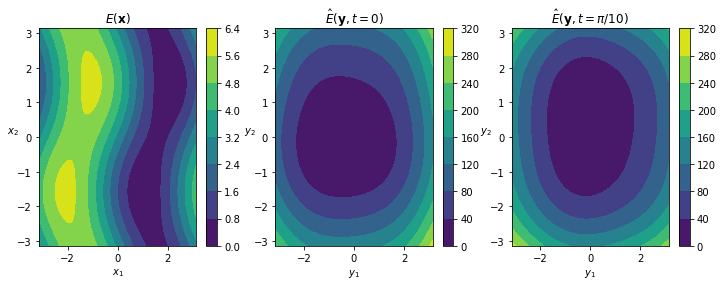

In [74]:
import numpy as np
import matplotlib.pyplot as plt
size = np.pi

fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)


# look at the energy plotted over the z=pi section

xx = np.linspace(-np.pi, np.pi, 100)
yy = np.linspace(-np.pi, np.pi, 100)

[X,Y] = np.meshgrid(xx, yy)

image1 = ax.contourf(xx,yy, np.squeeze(E_inXframe_numpy(0, X,Y,np.pi)))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$', rotation=0)
ax.set_title('$E(\mathbf{x})$')
plt.colorbar(image1, ax = ax)

image2 = ax2.contourf(xx,xx, np.squeeze(E_inYframe_numpy(0, X,Y,np.pi)))
ax2.set_xlabel('$y_1$')
ax2.set_ylabel('$y_2$', rotation=0)
ax2.set_title('$\\hat{E}(\mathbf{y},t=0)$')
plt.colorbar(image2, ax = ax2)


image3 = ax3.contourf(xx,xx, np.squeeze(E_inYframe_numpy(np.pi/10, X,Y,np.pi)))
ax3.set_xlabel('$y_1$')
ax3.set_ylabel('$y_2$', rotation=0)
ax3.set_title('$\\hat{E}(\mathbf{y},t=\\pi/10)$')
plt.colorbar(image3, ax = ax3)


### We now calculate the deformation velocity in both the $\mathbf{x}-$  and $\mathbf{y}-$ frames

In [82]:
a = sy.pi

In [83]:
I = InertiaTensor([-a, a], [-a, a], [-a, a])


The moment of inertia tensor looks like 


In [89]:
disp('\\boldsymbol{\\Theta}_x', I)

In [116]:
L = angularMomentum3D(velocityABCOrig, [x1,x2,x3], [-a,a], [-a,a], [-a,a])
omega = calculateOmega(I, L)
disp('\\boldsymbol{\omega}',omega)
vdefXframe = relativeVelocity3D(velocityABCOrig, [x1,x2,x3], omega, [-a,a], [-a,a], [-a,a])
disp('\\mathbf{v}_d(\\mathbf{x})', vdefXframe)

to simplify, we will look at the snapshots $t=0$ and $t=\pi/10$

In [121]:
# t= 0

t0 = 0 
L0 = angularMomentum3D(vTransformed.subs(t,t0), [y1,y2,y3], [-a,a], [-a,a], [-a,a])
omega0 = sy.simplify(calculateOmega(I, L0))
disp('\\boldsymbol{\omega}_{t=0}',omega0)
vdefYframe_t0 = relativeVelocity3D(vTransformed.subs(t,t0), [y1,y2,y3], omega0, [-a,a], [-a,a], [-a,a])

In [122]:
# t= 0

t1 = sy.pi/10 
L1 = angularMomentum3D(vTransformed.subs(t,t1), [y1,y2,y3], [-a,a], [-a,a], [-a,a])
omega1 = sy.simplify(calculateOmega(I, L1))
disp('\\boldsymbol{\omega}_{t=\pi/10}',omega1)
vdefYframe_t1 = relativeVelocity3D(vTransformed.subs(t,t1), [y1,y2,y3], omega1, [-a,a], [-a,a], [-a,a])

In [123]:
E_def_inXframe = vdefXframe.T @ vdefXframe * 0.5 ## E in the original, x frame
# substitute the standard parameters:
E_def_inXframe = E_def_inXframe.subs([(A, sy.sqrt(3)), (B, sy.sqrt(2)), (C,1)])

E_def_inXframe_numpy = sy.lambdify((x1, x2, x3), E_def_inXframe, 'numpy')



E_def_inYframe_t0 = vdefYframe_t0.T@vdefYframe_t0 * 0.5 ## E in the transformed, y frame
E_def_inYframe_t0 = E_def_inYframe_t0.subs([(A, sy.sqrt(3)), (B, sy.sqrt(2)), (C,1)])
E_def_inYframe_numpy_t0 = sy.lambdify((y1, y2, y3), E_def_inYframe_t0, 'numpy')



# t = \pi/10
E_def_inYframe_t1 = vdefYframe_t1.T @ vdefYframe_t1 * 0.5 ## E in the transformed, y frame
E_def_inYframe_t1 = E_def_inYframe_t1.subs([(A, sy.sqrt(3)), (B, sy.sqrt(2)), (C, 1)])
E_def_inYframe_numpy_t1 = sy.lambdify((y1, y2, y3), E_def_inYframe_t1, 'numpy')


 The deformation kinetic energies are objective, since
 
 
 $$
 E_d(\mathbf{x}) = \frac{1}{2} \langle\mathbf{v}_d,\mathbf{v}_d \rangle
 $$
 
 
 
 $$
 \hat{E}_d(\mathbf{Q}\mathbf{x}) = \frac{1}{2} \langle \hat{\mathbf{v}}_d,\hat{\mathbf{v}}_d \rangle = \frac{1}{2} \langle \mathbf{Q}^T{\mathbf{v}}_d,\mathbf{Q}^T{\mathbf{v}}_d \rangle = \frac{1}{2} \langle {\mathbf{v}}_d,{\mathbf{v}}_d \rangle = E_d(\mathbf{x})
 $$

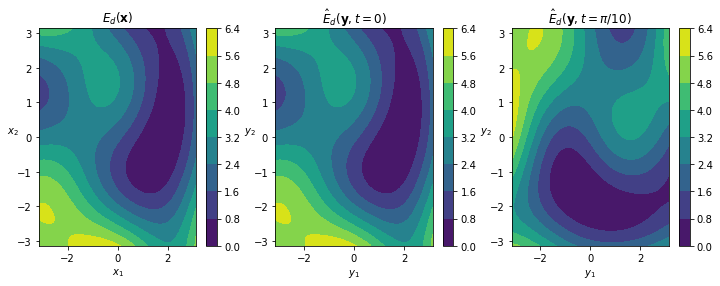

In [127]:
import numpy as np
import matplotlib.pyplot as plt
size = np.pi

fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)


# look at the energy plotted over the z=pi section

xx = np.linspace(-np.pi, np.pi, 100)
yy = np.linspace(-np.pi, np.pi, 100)

[X,Y] = np.meshgrid(xx, yy)

image1 = ax.contourf(xx,yy, np.squeeze(E_def_inXframe_numpy( X,Y,np.pi)))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$', rotation=0)
ax.set_title('$E_d(\mathbf{x})$')
plt.colorbar(image1, ax = ax)

image2 = ax2.contourf(xx,xx, np.squeeze(E_def_inYframe_numpy_t0( X,Y,np.pi)))
ax2.set_xlabel('$y_1$')
ax2.set_ylabel('$y_2$', rotation=0)
ax2.set_title('$\\hat{E}_d(\mathbf{y},t=0)$')
plt.colorbar(image2, ax = ax2)


image3 = ax3.contourf(xx,xx, np.squeeze(E_def_inYframe_numpy_t1( X,Y,np.pi)))
ax3.set_xlabel('$y_1$')
ax3.set_ylabel('$y_2$', rotation=0)
ax3.set_title('$\\hat{E}_d(\mathbf{y},t=\\pi/10)$')
plt.colorbar(image3, ax = ax3)


## Numerical implementation

For a general 3D velocity field, let's denote the components by $u, v, w$.

$$
\mathbf{v}  = \begin{pmatrix} \dot{x} \\ \dot{y} \\ \dot{z} \end{pmatrix} = \begin{pmatrix} u \\ v \\ w \end{pmatrix}
$$

For simplicity, let's generate a synthetic dataset from the ABC flow

In [227]:
velocNP = sy.lambdify((x1, x2, x3), 
                      velocityABCOrig.subs([(A, sy.sqrt(3)), (B, sy.sqrt(2)), (C,1)]), 'numpy')
## convert it to a numpy function as ususal

In [268]:
# set up computational domain

xx = np.linspace(-np.pi, np.pi, 100)
yy = np.linspace(-np.pi, np.pi, 100)
zz = np.linspace(-np.pi, np.pi, 100)
[X, Y, Z] = np.meshgrid(xx, yy, zz)

In [269]:
u, v, w = np.squeeze(velocNP(X, Y, Z)) # velocNP gives a (3, 100, 100, 100) dimensional array, unpack over the first dimension
# need np.squeeze because it has a redundant dimension

Text(0.5, 1.0, '$z=\\pi$')

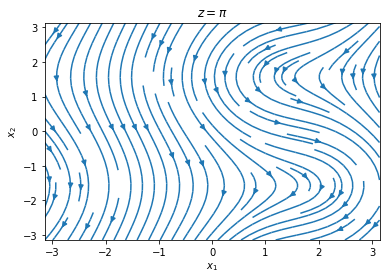

In [270]:
plt.streamplot(xx, yy, np.squeeze(u[:,:,0]), np.squeeze(v[:,:,0]))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('$z=\pi$' )

In [276]:

# We will use the symbolic calculation for the moment of inertia tensor. 
# That is compatible with numeric domains as well


def angularMomentum3D_data(U, V, W,  X, Y, Z): 
    Xrel, Yrel, Zrel = np.meshgrid(X - np.average(X), Y - np.average(Y), Z - np.average(Z)) # relative coordinates
    
    VecOfPositions = np.array([Xrel.ravel(), Yrel.ravel(), Zrel.ravel()]).T 
    VecOfVelocities = np.array([(U - np.average(U)).ravel(), (V - np.average(V)).ravel(), (W - np.average(W)).ravel()]).T
    return np.average(np.cross(VecOfPositions, VecOfVelocities), axis = 0)

def calculateOmega_data(inertiatensor, angularmomentum):
    return np.array(inertiatensor.inv(), dtype='float') @ angularmomentum 


def relativeVelocity3D_data(U, V, W, X, Y, Z, omega):
    xmax = np.max(X)
    xmin = np.min(X)
    ymax = np.max(Y)
    ymin = np.min(Y)
    
    zmax = np.max(Z)
    zmin = np.min(Z)
    
    x0 = np.mean([xmin, xmax])
    y0 = np.mean([ymin, ymax]) 
    z0 = np.mean([zmin, zmax]) # calculate the center of mass

    XX, YY, ZZ = np.meshgrid(X - x0, Y - y0, Z - z0)
    VecOfPositions = np.array([XX.ravel(), YY.ravel(), ZZ.ravel()]).T 
    omegaCrossX = np.cross(omega, VecOfPositions).reshape([*XX.shape, 3]) ## reshape the omega \times x vector to the size of the grid x 3
    
    Ubody = np.average(U) + omegaCrossX[:, :, :, 0]
    Vbody = np.average(V) + omegaCrossX[:, :, :, 1]
    Wbody = np.average(W) + omegaCrossX[:, :, :, 2]
    
    return U - Ubody, V - Vbody, W - Wbody





Numerically, we get the following result for $\omega$.

In [277]:
L_num = angularMomentum3D_data(u, v, w, xx, yy, zz)
omega_num = calculateOmega_data(I, L_num)
disp('\\boldsymbol{\omega}',omega_num)


In [280]:
Urel, Vrel, Wrel = relativeVelocity3D_data(u, v, w, xx, yy, zz, omega_num)

Compare the deformation streamlines between the symbolic and the numeric calculations

Text(0.5, 1.0, 'Numeric $\\mathbf{v}_d$')

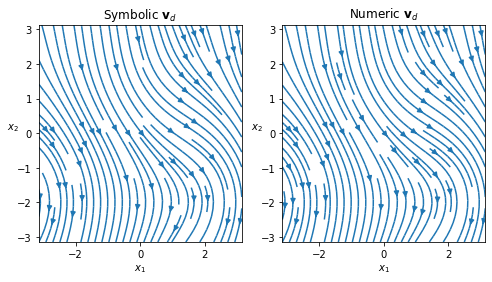

In [293]:
fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

xx = np.linspace(-np.pi, np.pi, 100)
yy = np.linspace(-np.pi, np.pi, 100)

[X,Y] = np.meshgrid(xx, yy)

velocDef_NP = sy.lambdify((x1, x2, x3), 
                      vdefXframe.subs([(A, sy.sqrt(3)), (B, sy.sqrt(2)), (C,1)]), 'numpy')

udisp, vdisp, wdisp = np.squeeze(velocDef_NP(X, Y, -np.pi)) # extract velocities in the x_3=-pi plane again

ax.streamplot(xx, yy, udisp, vdisp)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$', rotation=0)
ax.set_title('Symbolic $\mathbf{v}_d$')



ax2.streamplot(xx,yy, np.squeeze(Urel[:,:,0]), np.squeeze(Vrel[:,:,0])) # get the x3 = -pi plane, the first element along the 3rd dimension
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$', rotation=0)
ax2.set_title('Numeric $\mathbf{v}_d$')


Compare the deformation energies between the symbolic and the numeric calculations

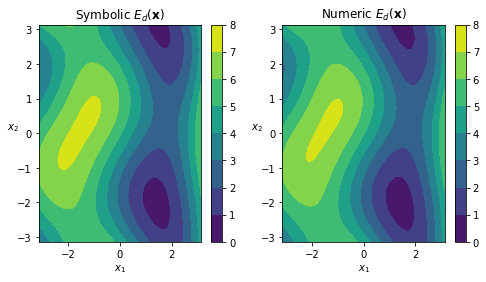

In [296]:
fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

xx = np.linspace(-np.pi, np.pi, 100)
yy = np.linspace(-np.pi, np.pi, 100)

[X,Y] = np.meshgrid(xx, yy)

image1 = ax.contourf(xx,yy, np.squeeze(E_def_inXframe_numpy( X, Y, -np.pi)))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$', rotation=0)
ax.set_title('Symbolic $E_d(\mathbf{x})$')
plt.colorbar(image1, ax = ax)



Edef = 0.5 * (Urel**2 + Vrel**2 + Wrel**2) # calculate the def. kinetic energy explicitly
image2 = ax2.contourf(xx, yy, np.squeeze(Edef[:,:,0]))  # get the x3 = -pi plane, the first element along the 3rd dimension

ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$', rotation=0)
ax2.set_title('Numeric $E_d(\mathbf{x})$')
plt.colorbar(image2, ax = ax2)
